In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fyp/Datasets/updated_dataset1.csv')
df.head()

,High_fever,severe_headache,pain_behind_eyes,joint_and_muscle_pain,Nausea,vomiting,swollen_glands,rash,Runny_nose,Cough,...,Confusion(older adults),persistent_cough,wheezing,chest_tightness,loss_of_scent,loss_of_taste,Mild_pneumonia,Fatigue,TYPE,Unnamed: 33
0,No,No,No,Yes,No,No,No,No,No,Yes,...,No,No,No,No,No,Yes,No,No,No,COVID
1,Yes,No,No,Yes,No,No,No,No,No,No,...,No,No,No,No,No,Yes,No,Yes,No,COVID
2,No,No,No,No,Yes,No,No,No,No,Yes,...,No,No,No,No,No,No,No,Yes,No,COVID
3,No,No,No,Yes,Yes,No,No,No,No,Yes,...,No,No,No,No,No,Yes,No,Yes,Yes,COVID
4,Yes,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,COVID


In [ ]:
#Encoding
categorical_columns = df.columns[:-1]

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
print("Encoded DataFrame:\n", df.head())

Encoded DataFrame:
    High_fever  severe_headache  pain_behind_eyes  joint_and_muscle_pain  \
0           0                0                 0                      1   
1           1                0                 0                      1   
2           0                0                 0                      0   
3           0                0                 0                      1   
4           1                0                 0                      0   

   Nausea  vomiting  swollen_glands  rash  Runny_nose  Cough  ...  \
0       0         0               0     0           0      1  ...   
1       0         0               0     0           0      0  ...   
2       1         0               0     0           0      1  ...   
3       1         0               0     0           0      1  ...   
4       0         0               0     0           0      0  ...   

   Confusion(older adults)  persistent_cough  wheezing  chest_tightness  \
0                        0             

In [ ]:
#K-Fold Cross-Validation Splitting

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)
X = df.drop('TYPE', axis=1)
y = df['TYPE']

In [ ]:
fold = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("X_train:\n", X_train)
    print("X_test:\n", X_test)
    print("y_train:\n", y_train)
    print("y_test:\n", y_test)

    fold += 1

Fold 1
X_train:
       High_fever  severe_headache  pain_behind_eyes  joint_and_muscle_pain  \
0              0                0                 0                      1   
3              0                0                 0                      1   
5              0                0                 0                      1   
6              1                0                 0                      0   
7              1                0                 0                      1   
...          ...              ...               ...                    ...   
3493           0                0                 0                      0   
3494           0                0                 0                      0   
3496           0                0                 0                      0   
3497           0                0                 0                      0   
3498           0                0                 0                      0   

      Nausea  vomiting  swollen_glands  rash  

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


<Figure size 1500x1000 with 0 Axes>

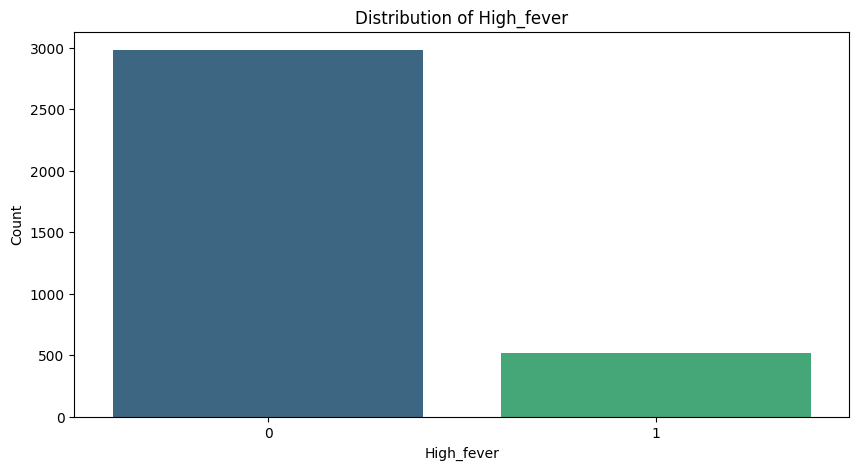

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


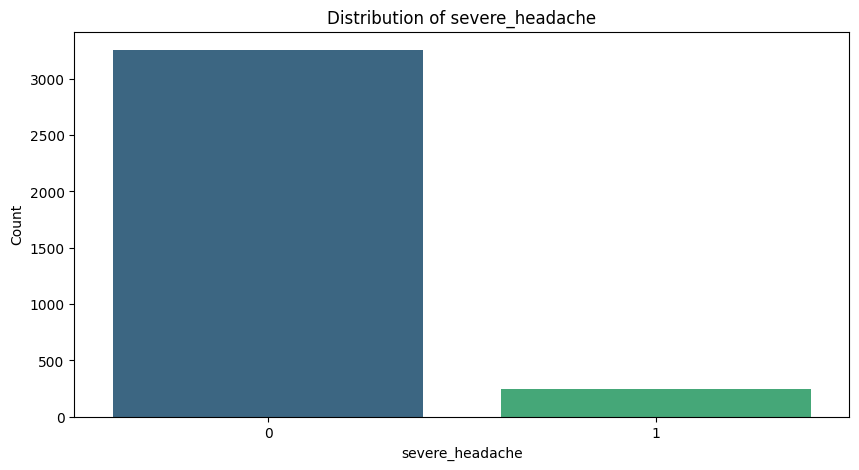

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


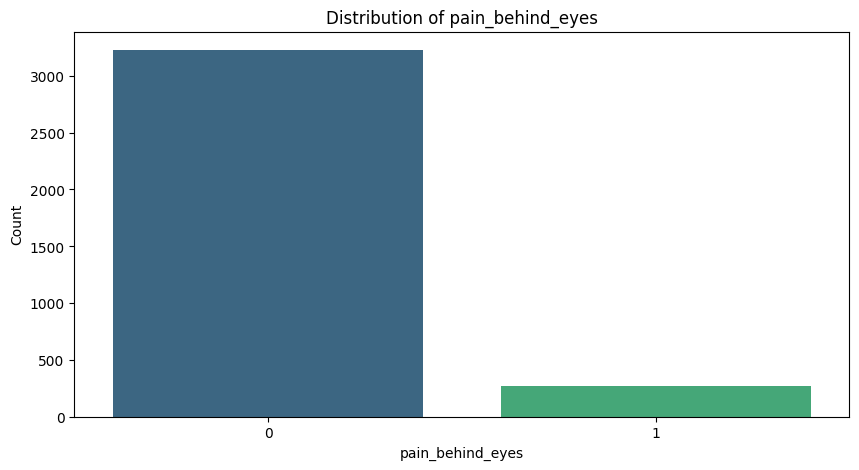

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


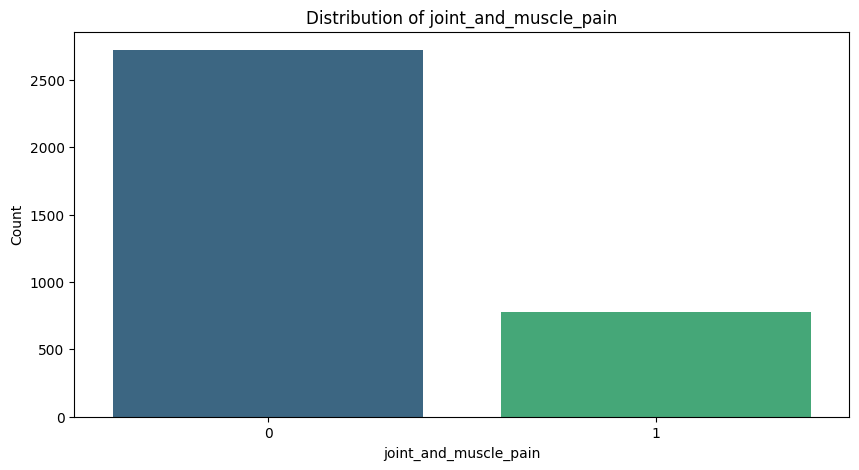

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


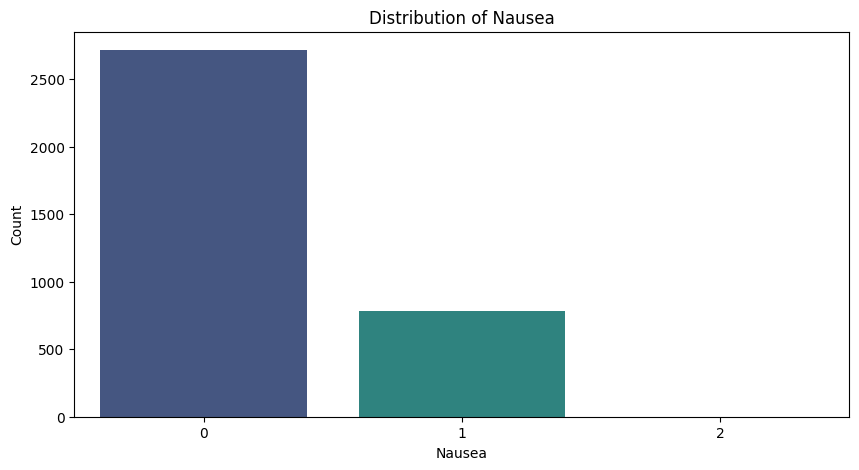

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


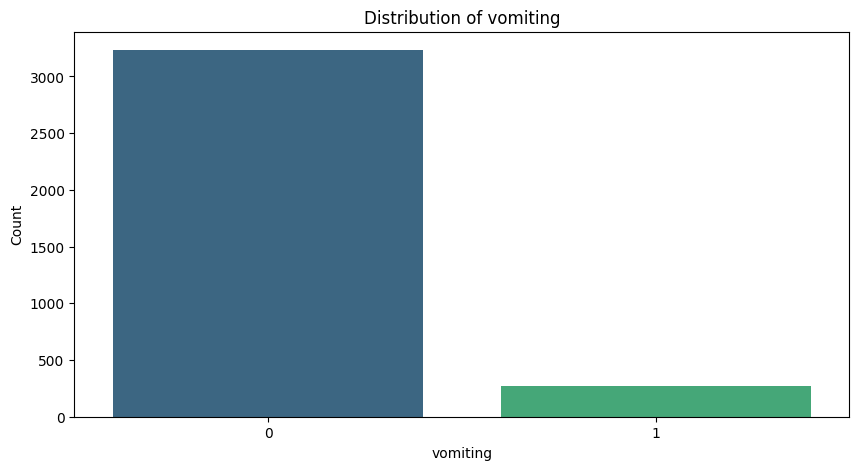

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


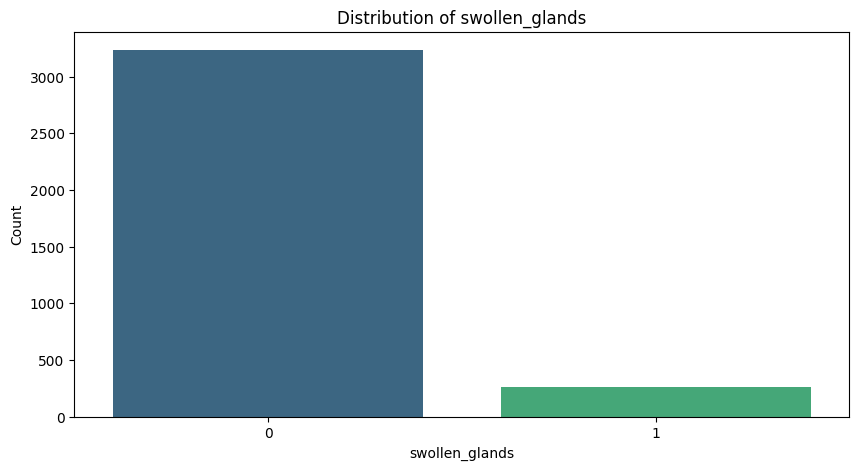

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


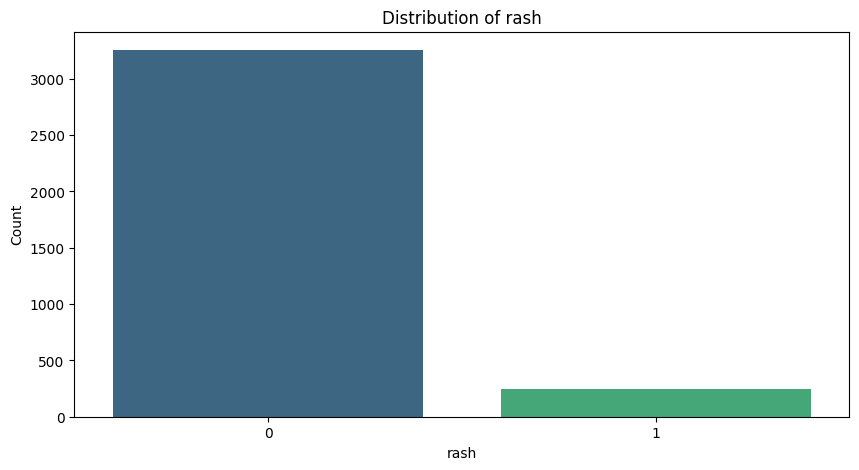

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


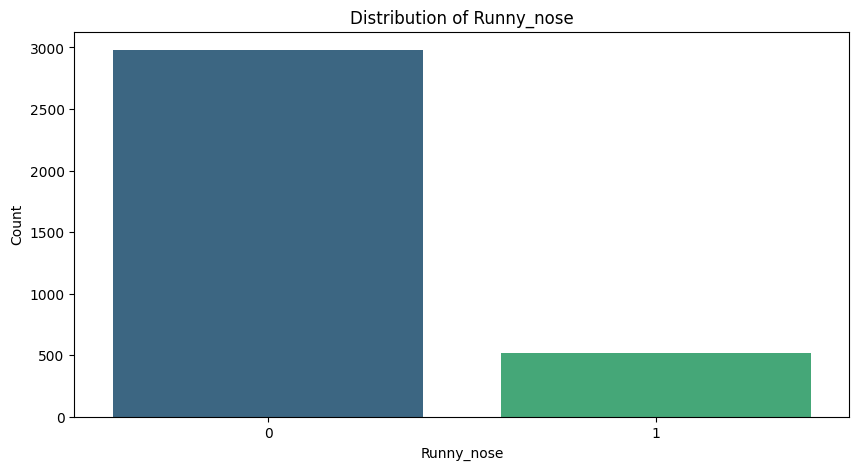

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


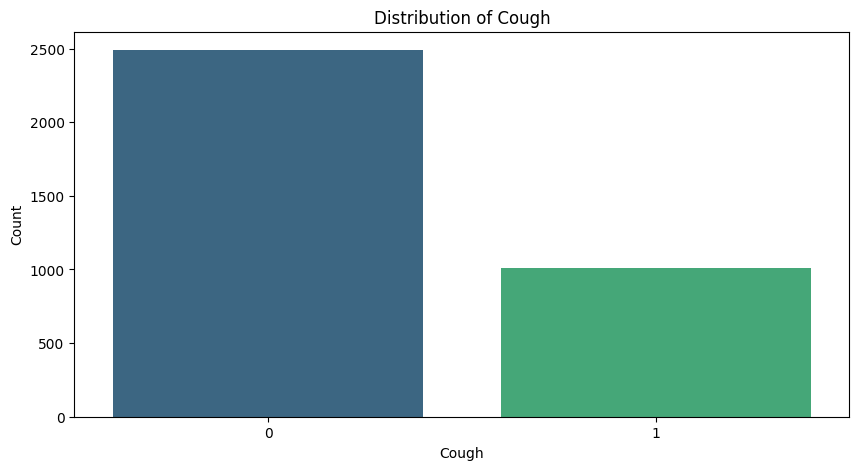

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


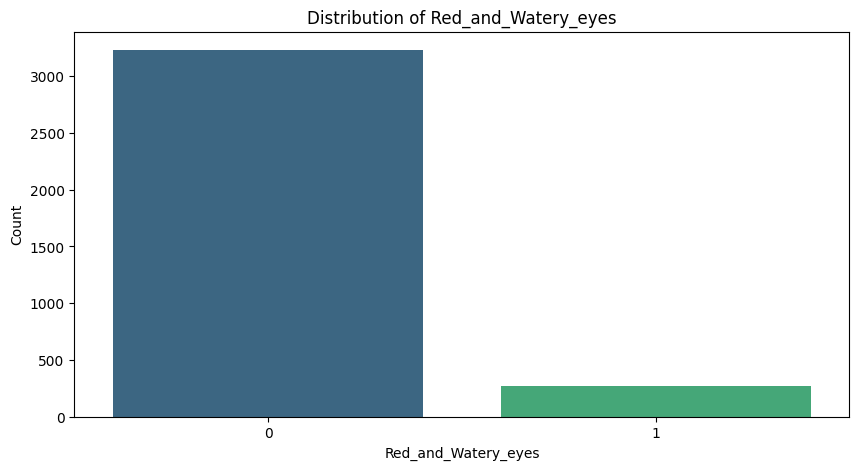

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


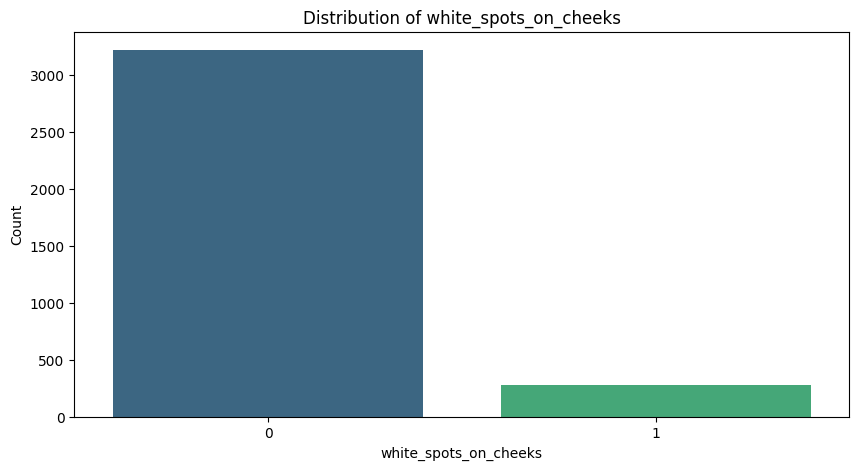

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


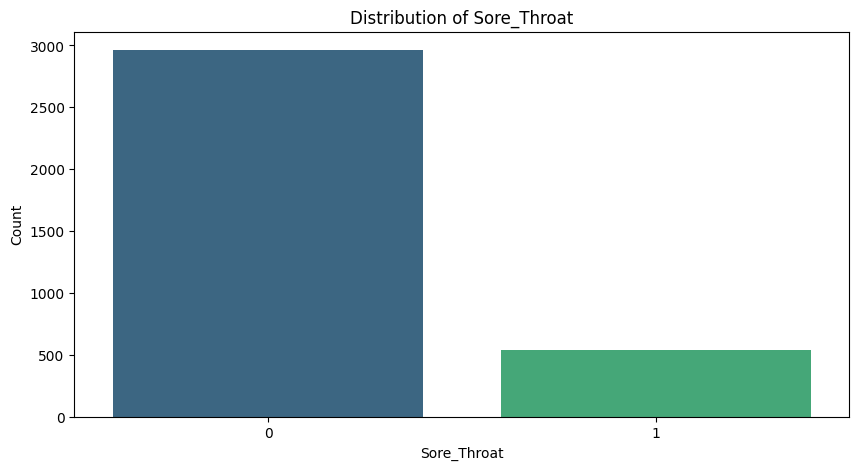

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


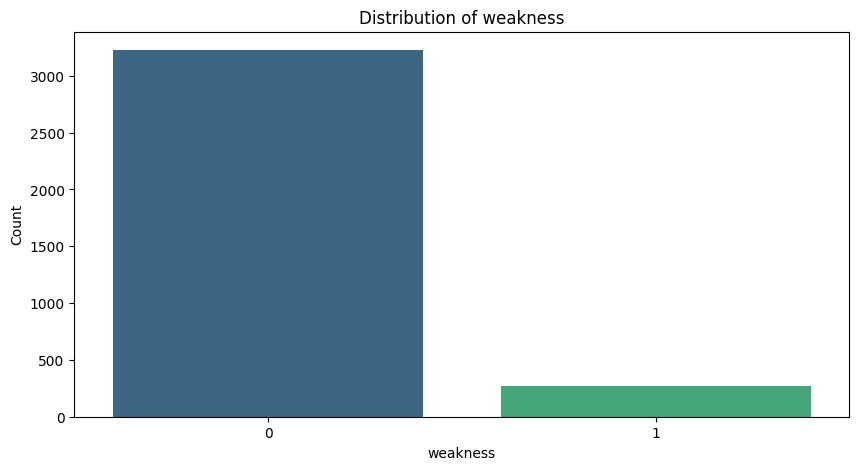

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


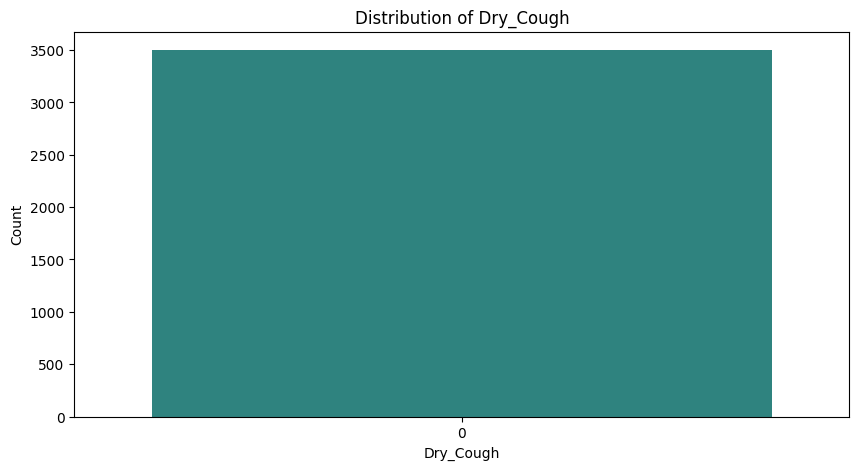

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


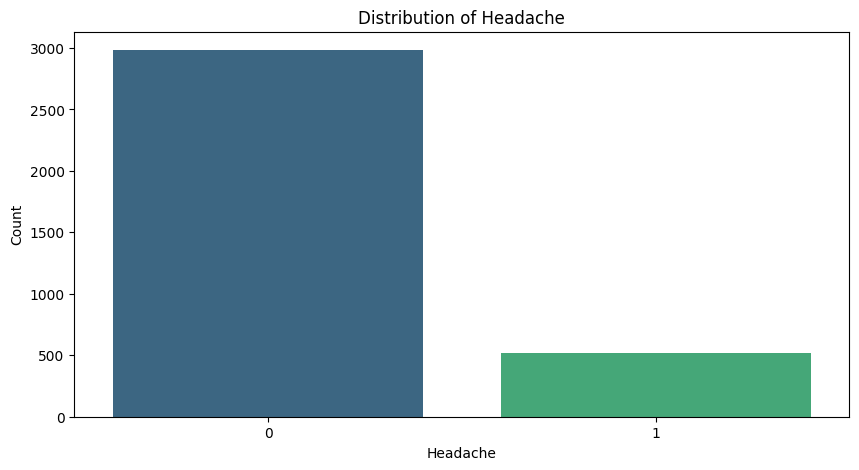

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


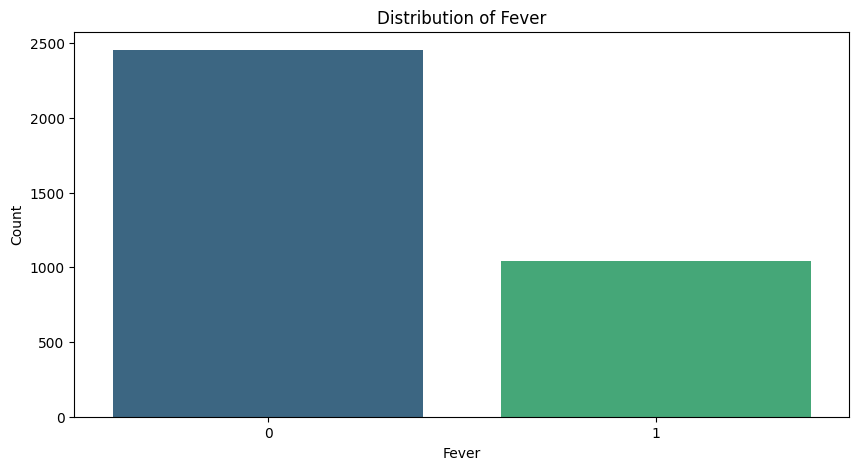

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


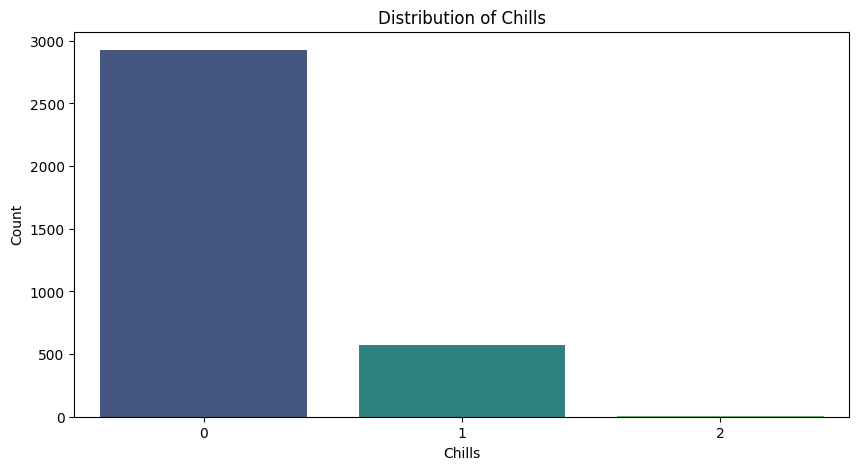

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


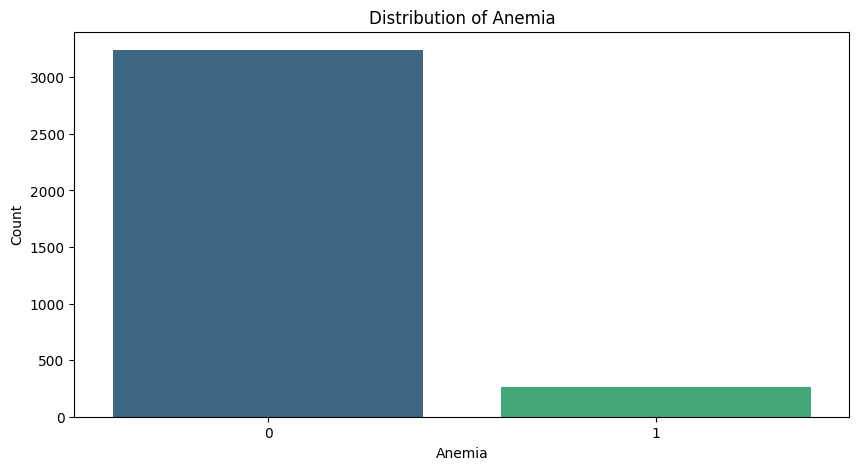

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


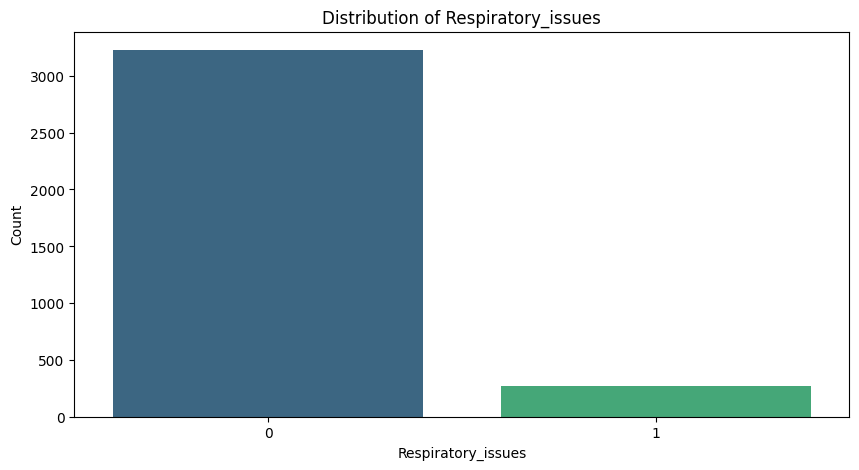

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


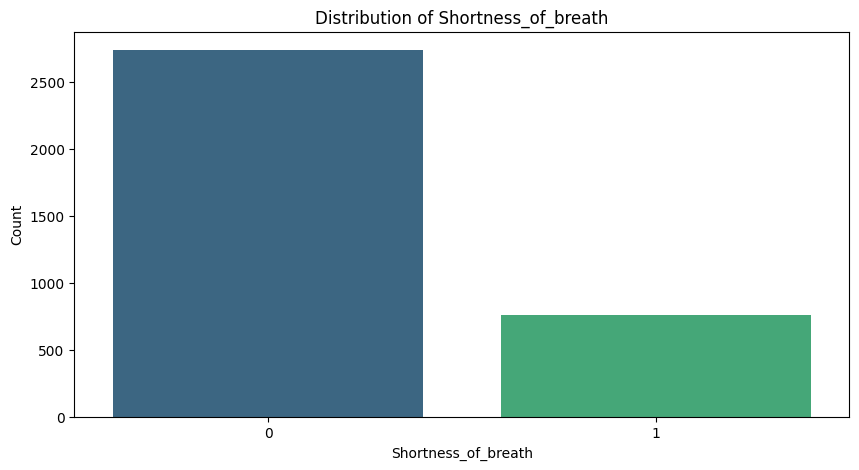

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


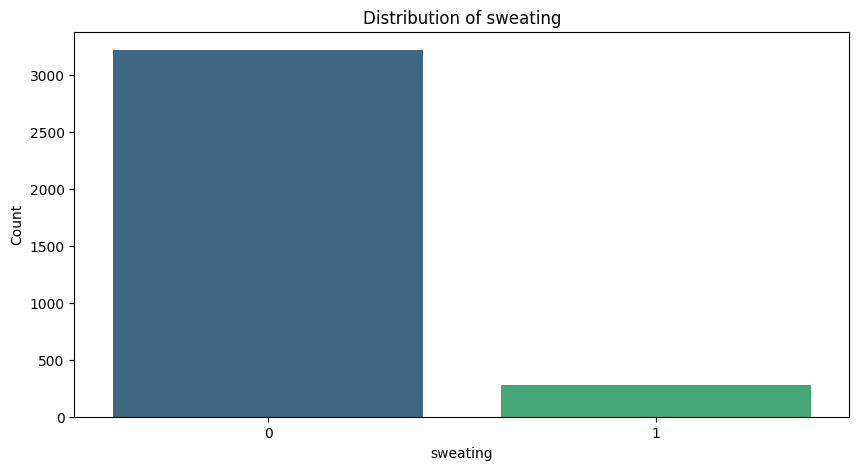

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


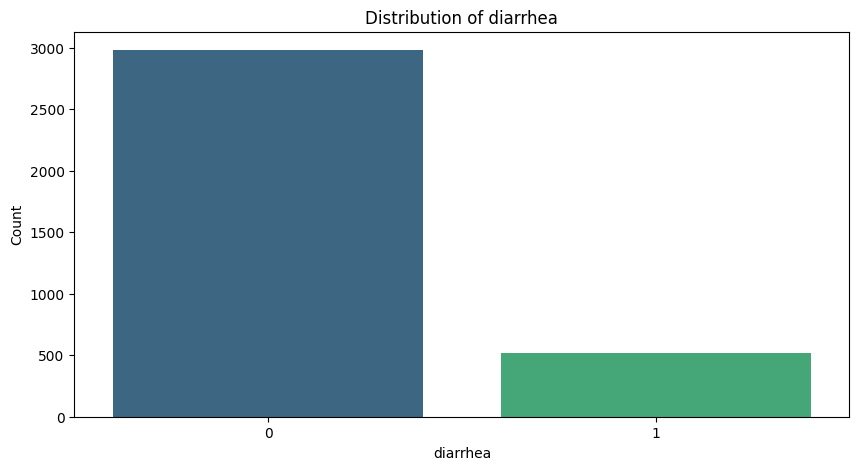

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


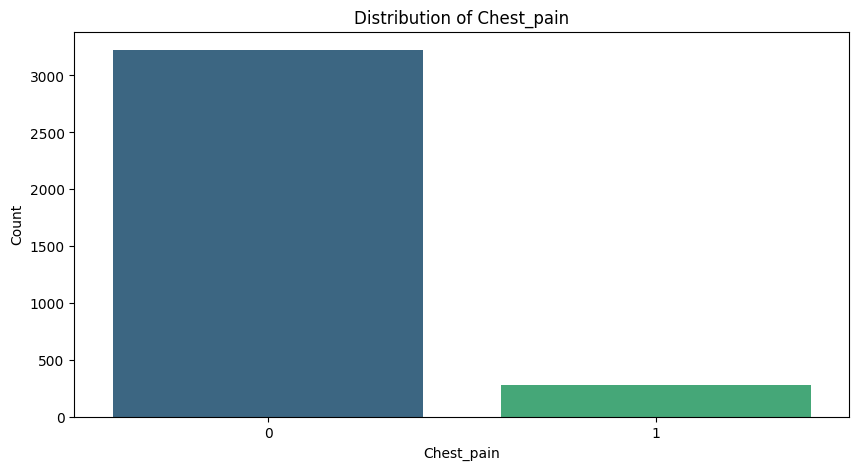

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


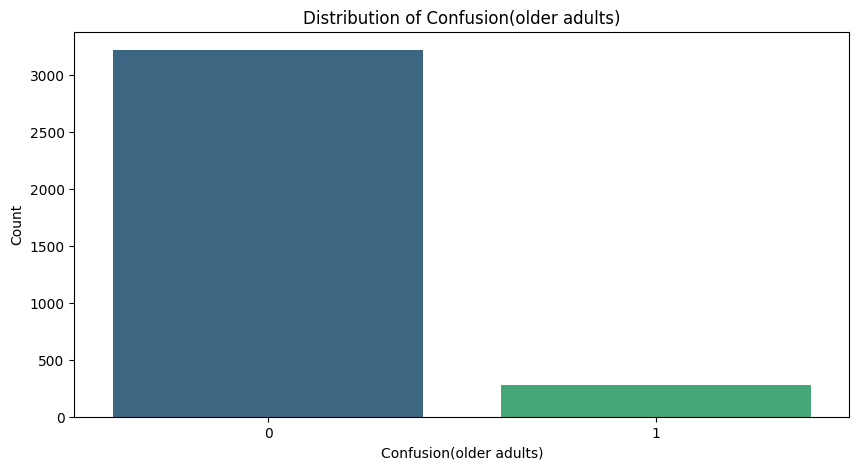

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


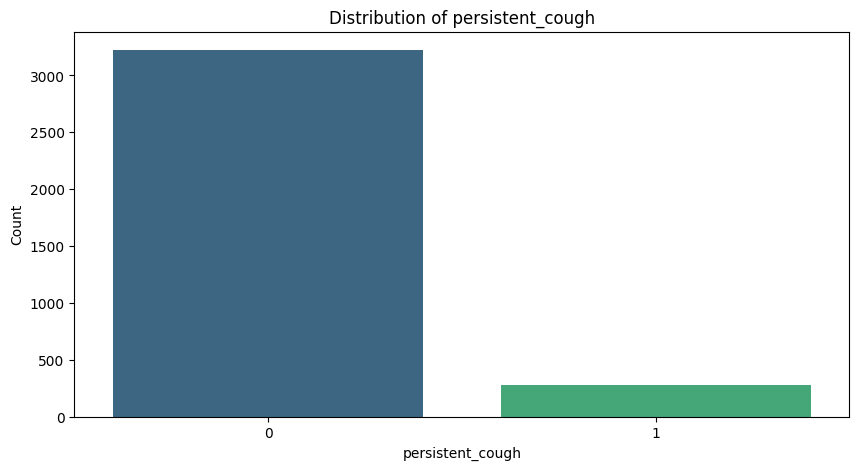

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


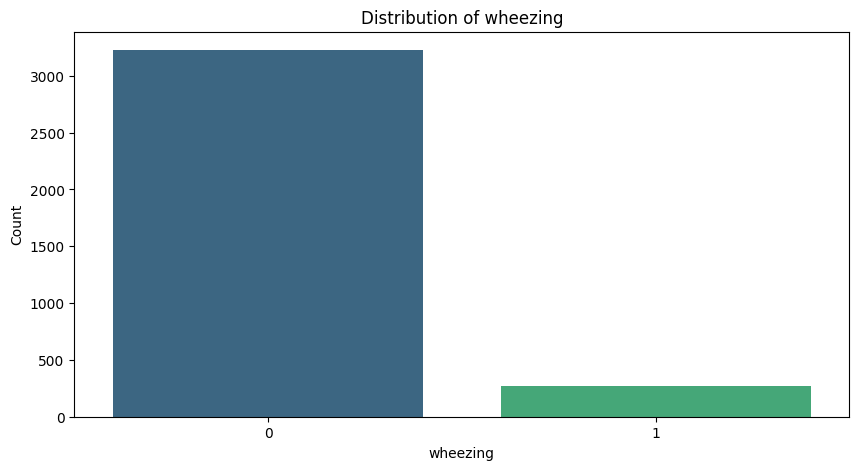

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


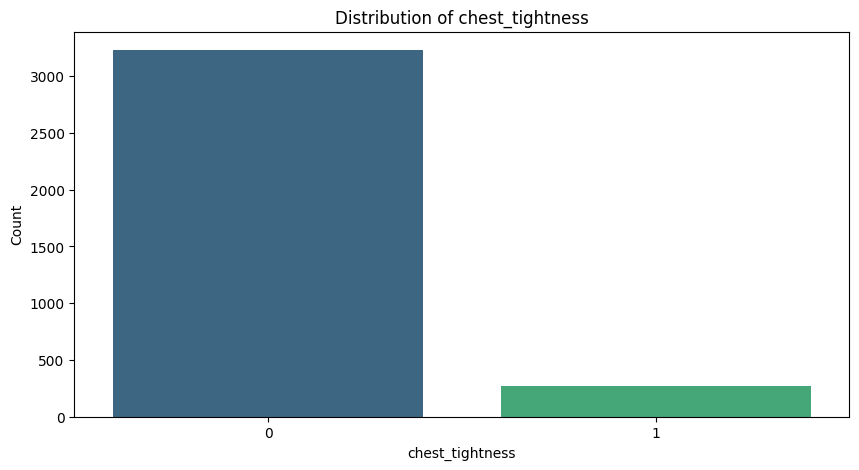

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


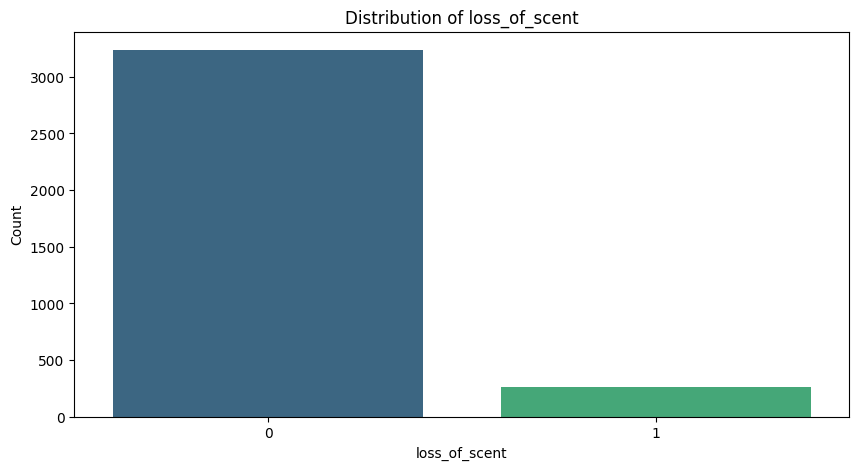

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


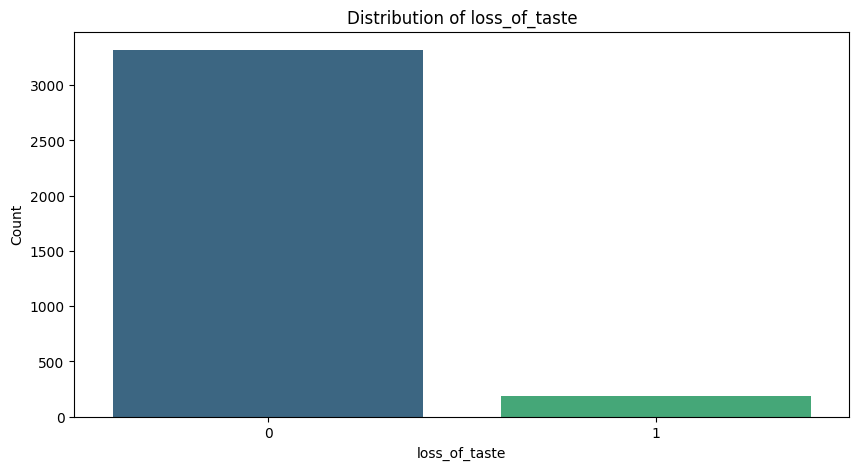

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


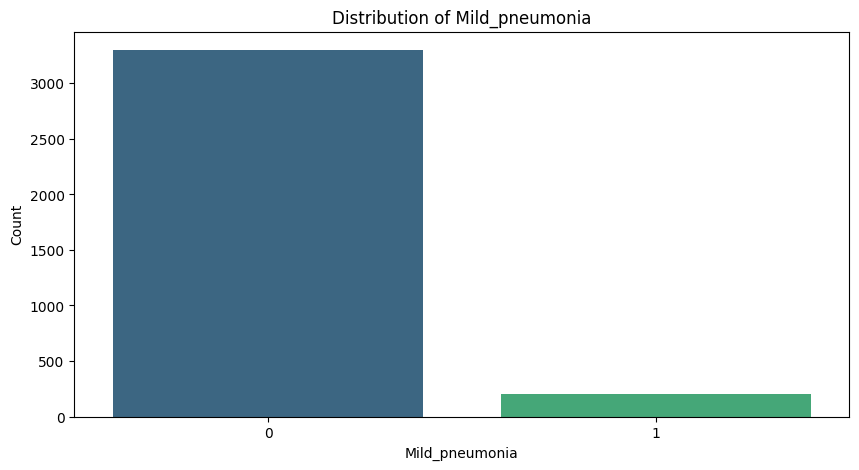

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


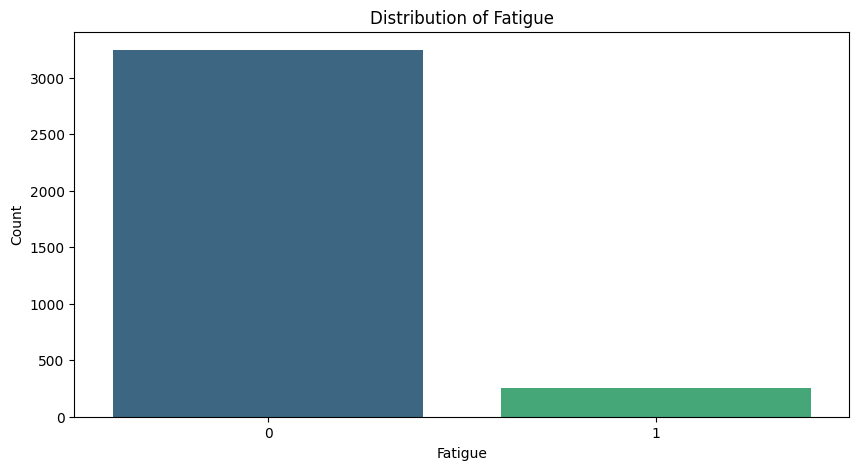

<ipython-input-10-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


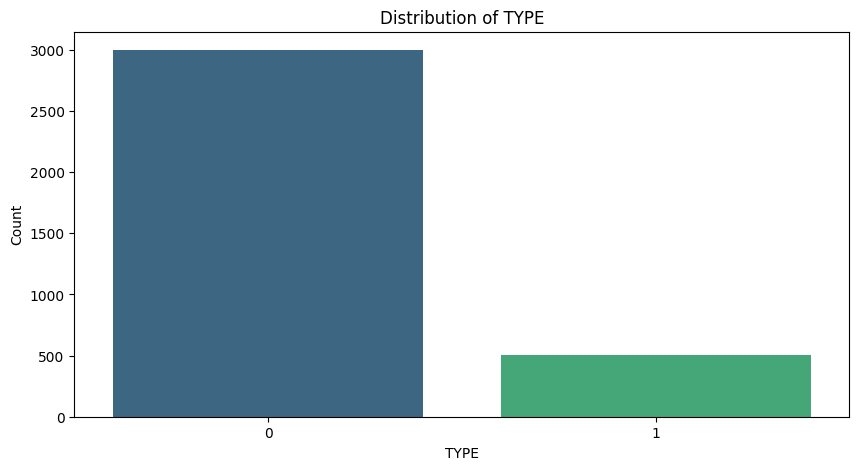

In [ ]:
symptoms = df.columns[:-1]
#symptoms
plt.figure(figsize=(15, 10))
for symptom in symptoms:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=symptom, palette='viridis')
    plt.title(f'Distribution of {symptom}')
    plt.xlabel(symptom)
    plt.ylabel('Count')
    plt.show()

<ipython-input-11-499f3ee3b5e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TYPE', palette='viridis')


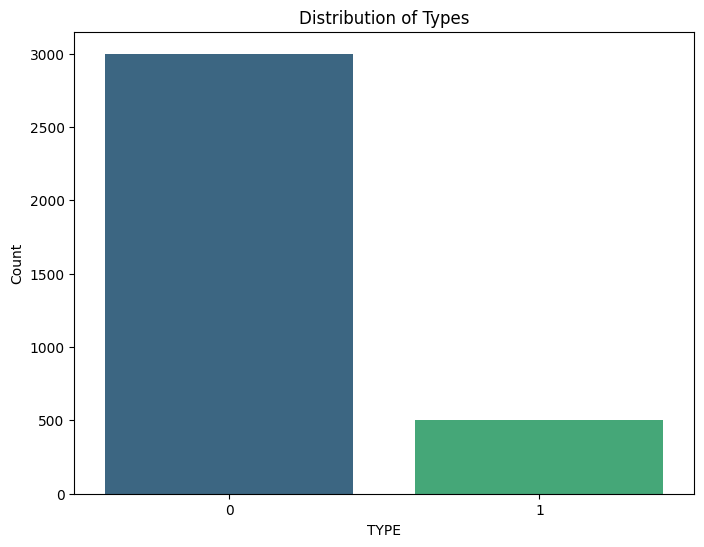

In [ ]:
#class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='TYPE', palette='viridis')
plt.title('Distribution of Types')
plt.xlabel('TYPE')
plt.ylabel('Count')
plt.show()

In [ ]:
#feature analysis
symptom_frequencies = df[symptoms].apply(pd.Series.value_counts).fillna(0)

print("Frequency of Symptoms:")
print(symptom_frequencies)

#symptom co-occurrence
co_occurrence = df[symptoms].apply(lambda x: pd.Series(x).value_counts()).fillna(0)

print("\nSymptom Co-occurrence:")
print(co_occurrence)

Frequency of Symptoms:
   High_fever  severe_headache  pain_behind_eyes  joint_and_muscle_pain  \
0      2982.0           3255.0            3229.0                 2722.0   
1       518.0            245.0             271.0                  778.0   
2         0.0              0.0               0.0                    0.0   

   Nausea  vomiting  swollen_glands    rash  Runny_nose   Cough  ...  \
0    2715    3233.0          3235.0  3255.0      2979.0  2490.0  ...   
1     784     267.0           265.0   245.0       521.0  1010.0  ...   
2       1       0.0             0.0     0.0         0.0     0.0  ...   

   Chest_pain  Confusion(older adults)  persistent_cough  wheezing  \
0      3224.0                   3222.0            3223.0    3226.0   
1       276.0                    278.0             277.0     274.0   
2         0.0                      0.0               0.0       0.0   

   chest_tightness  loss_of_scent  loss_of_taste  Mild_pneumonia  Fatigue  \
0           3232.0         32

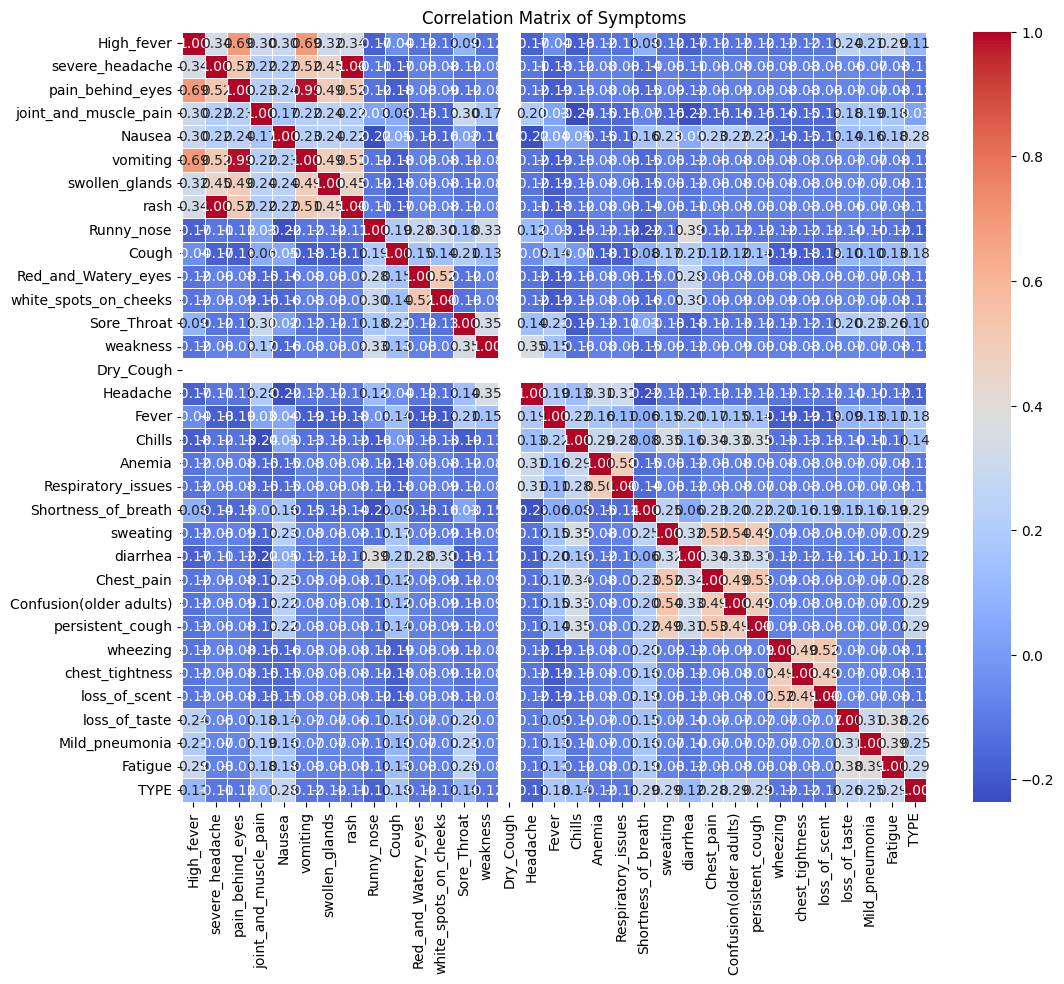

In [ ]:
#correlation analysis
df_binary = df.copy()
df_binary.replace({'Yes': 1, 'No': 0}, inplace=True)

correlation_matrix = df_binary[symptoms].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Symptoms')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

results = {model_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for model_name in models.keys()}

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[model_name]['accuracy'].append(accuracy)
        results[model_name]['precision'].append(precision)
        results[model_name]['recall'].append(recall)
        results[model_name]['f1'].append(f1)

        print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    fold += 1

print("\nAverage Metrics for each model after K-Fold Cross-Validation:")
for model_name, metrics in results.items():
    avg_accuracy = sum(metrics['accuracy']) / k
    avg_precision = sum(metrics['precision']) / k
    avg_recall = sum(metrics['recall']) / k
    avg_f1 = sum(metrics['f1']) / k
    print(f"{model_name} - Avg Accuracy: {avg_accuracy:.2f}, Avg Precision: {avg_precision:.2f}, Avg Recall: {avg_recall:.2f}, Avg F1 Score: {avg_f1:.2f}")

Fold 1
Logistic Regression - Accuracy: 0.84, Precision: 0.82, Recall: 0.84, F1 Score: 0.82
K-Nearest Neighbors - Accuracy: 0.85, Precision: 0.85, Recall: 0.85, F1 Score: 0.85
Naive Bayes - Accuracy: 0.77, Precision: 0.91, Recall: 0.77, F1 Score: 0.80
Decision Tree - Accuracy: 0.83, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Support Vector Machine - Accuracy: 0.83, Precision: 0.80, Recall: 0.83, F1 Score: 0.81
Fold 2
Logistic Regression - Accuracy: 0.86, Precision: 0.84, Recall: 0.86, F1 Score: 0.85
K-Nearest Neighbors - Accuracy: 0.88, Precision: 0.89, Recall: 0.88, F1 Score: 0.88
Naive Bayes - Accuracy: 0.77, Precision: 0.92, Recall: 0.77, F1 Score: 0.81
Decision Tree - Accuracy: 0.87, Precision: 0.86, Recall: 0.87, F1 Score: 0.86
Support Vector Machine - Accuracy: 0.88, Precision: 0.89, Recall: 0.88, F1 Score: 0.88
Fold 3
Logistic Regression - Accuracy: 0.87, Precision: 0.85, Recall: 0.87, F1 Score: 0.85
K-Nearest Neighbors - Accuracy: 0.86, Precision: 0.87, Recall: 0.86, F1 Score

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
ada_clf = AdaBoostClassifier(n_estimators=100)
gb_clf = GradientBoostingClassifier(n_estimators=100)
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_clf),
    ('ada', ada_clf),
    ('gb', gb_clf)
], voting='soft')

results = {model_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for model_name in ['XGBoost', 'AdaBoost', 'GradientBoosting', 'Voting']}

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # XGBoost
    xgb_clf.fit(X_train, y_train)
    xgb_pred = xgb_clf.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
    xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
    xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')
    results['XGBoost']['accuracy'].append(xgb_accuracy)
    results['XGBoost']['precision'].append(xgb_precision)
    results['XGBoost']['recall'].append(xgb_recall)
    results['XGBoost']['f1'].append(xgb_f1)
    print(f"XGBoost - Accuracy: {xgb_accuracy:.2f}, Precision: {xgb_precision:.2f}, Recall: {xgb_recall:.2f}, F1 Score: {xgb_f1:.2f}")

    # AdaBoost
    ada_clf.fit(X_train, y_train)
    ada_pred = ada_clf.predict(X_test)
    ada_accuracy = accuracy_score(y_test, ada_pred)
    ada_precision = precision_score(y_test, ada_pred, average='weighted')
    ada_recall = recall_score(y_test, ada_pred, average='weighted')
    ada_f1 = f1_score(y_test, ada_pred, average='weighted')
    results['AdaBoost']['accuracy'].append(ada_accuracy)
    results['AdaBoost']['precision'].append(ada_precision)
    results['AdaBoost']['recall'].append(ada_recall)
    results['AdaBoost']['f1'].append(ada_f1)
    print(f"AdaBoost - Accuracy: {ada_accuracy:.2f}, Precision: {ada_precision:.2f}, Recall: {ada_recall:.2f}, F1 Score: {ada_f1:.2f}")

    # Gradient Boosting
    gb_clf.fit(X_train, y_train)
    gb_pred = gb_clf.predict(X_test)
    gb_accuracy = accuracy_score(y_test, gb_pred)
    gb_precision = precision_score(y_test, gb_pred, average='weighted')
    gb_recall = recall_score(y_test, gb_pred, average='weighted')
    gb_f1 = f1_score(y_test, gb_pred, average='weighted')
    results['GradientBoosting']['accuracy'].append(gb_accuracy)
    results['GradientBoosting']['precision'].append(gb_precision)
    results['GradientBoosting']['recall'].append(gb_recall)
    results['GradientBoosting']['f1'].append(gb_f1)
    print(f"Gradient Boosting - Accuracy: {gb_accuracy:.2f}, Precision: {gb_precision:.2f}, Recall: {gb_recall:.2f}, F1 Score: {gb_f1:.2f}")

    # Voting Classifier
    voting_clf.fit(X_train, y_train)
    voting_pred = voting_clf.predict(X_test)
    voting_accuracy = accuracy_score(y_test, voting_pred)
    voting_precision = precision_score(y_test, voting_pred, average='weighted')
    voting_recall = recall_score(y_test, voting_pred, average='weighted')
    voting_f1 = f1_score(y_test, voting_pred, average='weighted')
    results['Voting']['accuracy'].append(voting_accuracy)
    results['Voting']['precision'].append(voting_precision)
    results['Voting']['recall'].append(voting_recall)
    results['Voting']['f1'].append(voting_f1)
    print(f"Voting Classifier - Accuracy: {voting_accuracy:.2f}, Precision: {voting_precision:.2f}, Recall: {voting_recall:.2f}, F1 Score: {voting_f1:.2f}")

    fold += 1

print("\nAverage Metrics for each model after K-Fold Cross-Validation:")
for model_name, metrics in results.items():
    avg_accuracy = sum(metrics['accuracy']) / k
    avg_precision = sum(metrics['precision']) / k
    avg_recall = sum(metrics['recall']) / k
    avg_f1 = sum(metrics['f1']) / k
    print(f"{model_name} - Avg Accuracy: {avg_accuracy:.2f}, Avg Precision: {avg_precision:.2f}, Avg Recall: {avg_recall:.2f}, Avg F1 Score: {avg_f1:.2f}")


Fold 1
XGBoost - Accuracy: 0.85, Precision: 0.84, Recall: 0.85, F1 Score: 0.85
AdaBoost - Accuracy: 0.85, Precision: 0.85, Recall: 0.85, F1 Score: 0.85
Gradient Boosting - Accuracy: 0.84, Precision: 0.84, Recall: 0.84, F1 Score: 0.84
Voting Classifier - Accuracy: 0.85, Precision: 0.85, Recall: 0.85, F1 Score: 0.85
Fold 2
XGBoost - Accuracy: 0.87, Precision: 0.89, Recall: 0.87, F1 Score: 0.88
AdaBoost - Accuracy: 0.87, Precision: 0.89, Recall: 0.87, F1 Score: 0.87
Gradient Boosting - Accuracy: 0.87, Precision: 0.89, Recall: 0.87, F1 Score: 0.88
Voting Classifier - Accuracy: 0.87, Precision: 0.88, Recall: 0.87, F1 Score: 0.88
Fold 3
XGBoost - Accuracy: 0.87, Precision: 0.88, Recall: 0.87, F1 Score: 0.87
AdaBoost - Accuracy: 0.86, Precision: 0.88, Recall: 0.86, F1 Score: 0.87
Gradient Boosting - Accuracy: 0.86, Precision: 0.87, Recall: 0.86, F1 Score: 0.87
Voting Classifier - Accuracy: 0.87, Precision: 0.88, Recall: 0.87, F1 Score: 0.88
Fold 4
XGBoost - Accuracy: 0.84, Precision: 0.83, Re